In [1]:
import logging
logging.basicConfig(
  level=logging.INFO,  
  format="%(asctime)s - %(name)s - %(levelname)s - %(message)s",  
)
logging.getLogger("httpx").setLevel(logging.WARNING)
LOGGER = logging.getLogger(__name__)

import os
import pandas as pd
import tempfile
from typing_extensions import override
from bondable.bond.config import Config
from bondable.bond.functions import Functions, DefaultFunctions
from bondable.bond.agent import Agent
from bondable.bond.builder import AgentBuilder, AgentDefinition
from IPython.display import Image, display
from dotenv import load_dotenv


load_dotenv(override=True)

user_id = "test@user.com"

config = Config.config()
builtin_functions = Functions.functions()
builder = AgentBuilder.builder()
builder.cleanup()

2025-03-10 20:30:46,356 - bondable.bond.config - INFO - Created Config instance
2025-03-10 20:30:46,357 - bondable.bond.functions - INFO - Created Functions instance using class: (bondable.bond.functions.DefaultFunctions)
2025-03-10 20:30:46,363 - bondable.bond.builder - INFO - Created AgentBuilder instance using database engine: sqlite:///.bondcache.db


In [5]:
agent_def = AgentDefinition(
    name="Simple Agent",
    description="Pirate Agent.",
    instructions="Answer requests from user like a pirate.",
    metadata={'visible': 'True'},
    tools=[{"type": "code_interpreter"}]
)
# simple_agent = builder.get_agent(agent_def)
# print(simple_agent)
builder.print_responses(user_id, ['tell me a joke'], agent_def)

2025-03-10 20:33:29,776 - bondable.bond.builder - INFO - Created new agent [Simple Agent] with assistant_id: asst_x4N6FvzGZa3BHYCp6YgBuhHg


[msg_LNNdZfPnXv5ey5CJhVo3navI/user] => tell me a joke
[msg_kgsuCDkranHGbQK0ileZUo8c_0/assistant] => Ahoy, matey! Why did the pirate go to the gym? 

To improve his "arrrrrrrrm" strength! Har har har! 🏴‍☠️


In [6]:
agent_def = AgentDefinition(
    name="Function Agent",
    description="Say hello to the user.",
    instructions="Call the simple method 'hello' with the name provided by the user. If no name is provided, ask the user to provide a name.",
    metadata={'visible': 'True'},
    tools=[builtin_functions.hello],
)
builder.print_responses(user_id, ['my name is john'], agent_def)

2025-03-10 20:33:53,422 - bondable.bond.builder - INFO - Created new agent [Function Agent] with assistant_id: asst_41i7dpUc044pSDkTpAVoglmr


[msg_c07xaTBNgKA0mjdkDofFO8CY/user] => my name is john


2025-03-10 20:33:57,425 - bondable.bond.functions - INFO - Saying hello to: john


[msg_0eFxOdXvpAay7mctSa1XiIE7_0/assistant] => Hello, John!


2025-03-10 20:34:19,697 - bondable.bond.builder - INFO - Created new agent [Synth Agent] with assistant_id: asst_ad7lxoRXAQBg4ANZNmVa41e7
2025-03-10 20:34:20,568 - bondable.bond.builder - INFO - Reusing agent [Synth Agent] with assistant_id: asst_ad7lxoRXAQBg4ANZNmVa41e7


[msg_HRnG7hBgMxTEUpDu77oNSwiP/user] => Generate the data set
[msg_0FJElXexX47PjRSB1LMdnZy7_0/assistant] => I have generated a synthetic dataset containing the height (in cm) and weight (in kg) of 100 people. Here are the first five entries:

| Height (cm) | Weight (kg) |
|--------------|-------------|
| 174.97       | 48.77       |
| 168.62       | 63.69       |
| 176.48       | 64.86       |
| 185.23       | 57.97       |
| 167.66       | 67.58       |

If you have any specific questions or analyses you'd like to perform on this dataset, feel free to ask!
[msg_a2UWgGD51FHU2sQPwQEMZIrV/user] => How many people are there
[msg_xTndrsguLWriijUHVWvGiHYP_0/assistant] => There are a total of 100 people in the dataset. If you have any other questions or need further analysis, let me know!
[msg_7Cd5KJVl9MFTQubF0USGNFkE/user] => What is the average height
[msg_dT2gMYUsTNpZt1m6CrXTn3zk_0/assistant] => The average height of the 100 people in the dataset is approximately 168.96 cm. If you have any

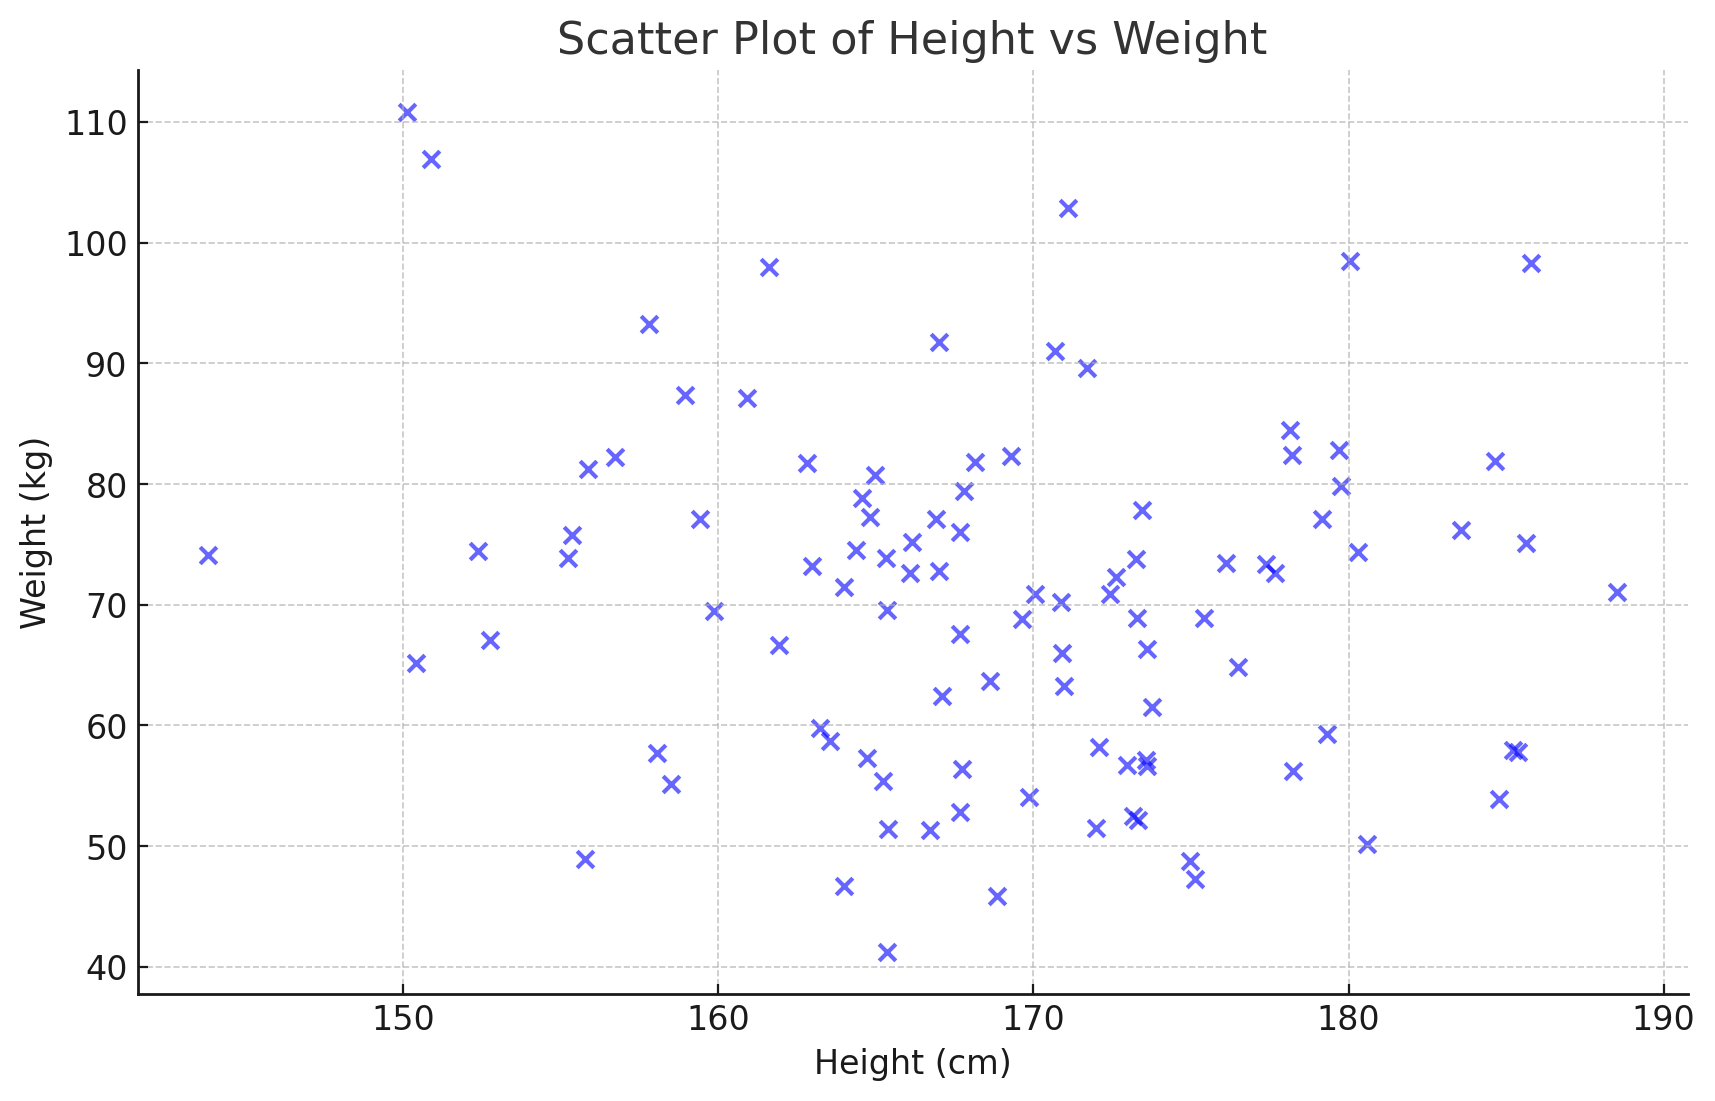

[msg_e4PTosFgUc2QXDVdM2UGW0nQ_1/assistant] => Here is the scatter plot of height versus weight for the dataset. Each point represents an individual, showing the relationship between their height (in cm) and weight (in kg). If you have any specific analyses or further questions regarding this data, feel free to ask!


In [7]:
agent_def = AgentDefinition(
    name="Synth Agent",
    description="An agent that will load synthetic data about people and answer questions",
    instructions="""When you begin you should create a synthetic data set that has the weight 
    and height of 100 people. You should answer questions about the data set
    """,
    tools=[{"type": "code_interpreter"}],
    metadata={'visible': 'True', 'initial_prompt': 'Generate the data set'},

)
agent = builder.get_agent(agent_def)
prompts = [
  agent.get_metadata_value('initial_prompt'),
  "How many people are there",
  "What is the average height",
  "Show me a scatterplot of height vs weight"
]
builder.print_responses(user_id, prompts, agent_def)

In [3]:
# Create a sample data of users
data = {
  'Customer_ID': [1, 2, 3],
  'First_Name': ['Jack', 'Jane', 'Doe'],
  'Last_Name': ['Doe', 'Smith', 'Johnson'],
  'Email': ['john.doe@example.com', 'jane.smith@example.com', 'doe.johnson@example.com'],
  'Phone_Number': ['123-456-7890', '234-567-8901', '345-678-9012'],
  'Region': ['North', 'South', 'East'],
  'Salesperson': ['Alice', 'Bob', 'Charlie'],
  'Address': ['123 Elm St', '456 Oak St', '789 Pine St'],
  'ZIP_Code': ['12345', '23456', '34567'],
  'Last_Purchase_Amount': [100.50, 200.75, 150.00]
}


df = pd.DataFrame(data)
data_file = tempfile.NamedTemporaryFile(suffix=".csv", delete=True)
df.to_csv(data_file.name, index=False)

agent_def = AgentDefinition(
    name="File Agent",
    description="An agent that will load data about people and answer questions",
    instructions="""
    Answer questions about user data in the attached CSV file. The first row contains the
    names of the columns. 
    """,
    tools=[{"type": "code_interpreter"}],
    tool_resources={
      "code_interpreter": {
        "files": [data_file.name]
      }
    },
    metadata={'visible': 'True', 'initial_prompt': 'What are all of the customer names?'},
)
agent = builder.get_agent(agent_def)
prompts = [
  agent.get_metadata_value('initial_prompt'),
]
builder.print_responses(user_id, prompts, agent_def)

os.remove(data_file.name)




2025-03-10 20:31:23,461 - bondable.bond.builder - INFO - Created new file record for /var/folders/6q/wg6mrh2s58z0x2l95mpvz1440000gn/T/tmpddi59ibk.csv
2025-03-10 20:31:24,684 - bondable.bond.broker - INFO - Created Broker instance
2025-03-10 20:31:24,687 - bondable.bond.builder - INFO - Created new agent [File Agent] with assistant_id: asst_1m48GvFKeNFotwq9Lt1qZa0L
2025-03-10 20:31:25,455 - bondable.bond.builder - INFO - Reusing agent [File Agent] with assistant_id: asst_1m48GvFKeNFotwq9Lt1qZa0L


[msg_Mu773A6FOKUHmTgact6K6W2R/user] => What are all of the customer names?
[msg_KBz2bSZWJ6lzjrSbf0PBen3U_0/assistant] => The customer names are as follows:

1. Jack Doe
2. Jane Smith
3. Doe Johnson


In [4]:
# Create a sample data of users
data = {
  'Customer_ID': [1, 2, 3],
  'First_Name': ['Jack', 'Jane', 'Doe'],
  'Last_Name': ['Doe', 'Smith', 'Johnson'],
  'Email': ['john.doe@example.com', 'jane.smith@example.com', 'doe.johnson@example.com'],
  'Phone_Number': ['123-456-7890', '234-567-8901', '345-678-9012'],
  'Region': ['North', 'South', 'East'],
  'Salesperson': ['Alice', 'Bob', 'Charlie'],
  'Address': ['123 Elm St', '456 Oak St', '789 Pine St'],
  'ZIP_Code': ['12345', '23456', '34567'],
  'Last_Purchase_Amount': [100.50, 200.75, 150.00]
}

df = pd.DataFrame(data)
html_file = tempfile.NamedTemporaryFile(suffix=".html", delete=True)
df.to_html(html_file.name, index=False)

agent_def = AgentDefinition(
    name="HTML File Agent",
    description="An agent that will load data about people and answer questions",
    instructions="""
    Answer questions about user data in the attached HTML file.
    """,
    tools=[{"type": "file_search"}],
    tool_resources={
      "file_search": {
        "files": [html_file.name]
      }
    },
    metadata={'visible': 'True', 'initial_prompt': 'What are all of the customer names?'},
)
agent = builder.get_agent(agent_def)
prompts = [
  agent.get_metadata_value('initial_prompt'),
]
builder.print_responses(user_id, prompts, agent_def)
os.remove(html_file.name)

2025-03-10 20:32:55,978 - bondable.bond.builder - INFO - Created new vector store HTML File Agent_file_search with vector_store_id: vs_67cfaee7e5348191b4cedf2ce5510ca2
2025-03-10 20:32:56,184 - bondable.bond.builder - INFO - Created new file record for /var/folders/6q/wg6mrh2s58z0x2l95mpvz1440000gn/T/tmpoth0be5d.html
2025-03-10 20:33:00,270 - bondable.bond.builder - INFO - Created new vector store [vs_67cfaee7e5348191b4cedf2ce5510ca2] file record for file: /var/folders/6q/wg6mrh2s58z0x2l95mpvz1440000gn/T/tmpoth0be5d.html
2025-03-10 20:33:01,678 - bondable.bond.builder - INFO - Created new agent [HTML File Agent] with assistant_id: asst_UcpvXu1L1G7bKZHf5ODBE1H0
2025-03-10 20:33:02,377 - bondable.bond.builder - INFO - Reusing agent [HTML File Agent] with assistant_id: asst_UcpvXu1L1G7bKZHf5ODBE1H0


[msg_2FlhP6729Rskv5uXOTKENbOm/user] => What are all of the customer names?
[msg_TVyxua5GkNNFY45aBpohHgmZ_0/assistant] => The customer names listed in the document are as follows:

1. Jack Doe
2. Jane Smith
3. Doe Johnson

These names are extracted from the customer data table found in the HTML file【4:0†source】.


In [ ]:
# create an agent that uses a tool written as a python method to answer questions
# the python method 'execute_sql_googlesheets' lives in fumctions.py
# this function will execute a SQL query on a google sheet

googlesheet_assistant = openai_client.beta.assistants.update(
    assistant_id=existing_assistants["Googlesheet Agent"],
    name="Googlesheet Agent",
    instructions="""
    You are an expert answering questions about customers. When asked a question, you should
    translate the question into a SQL query and execute it using the function execute_sql_googlesheets.
    The table name is 'df' and the columns are:
    - Customer_ID
    - First_Name
    - Last_Name
    - Email
    - Phone_Number
    - Region
    - Salesperson
    - Address
    - ZIP_Code
    - Last_Purchase_Amount

    An example question might be "How many customers are in each regio" which you would translate into:
    SELECT Region, COUNT(*) FROM df GROUP BY Region
    """,
    tools=[{"type": "code_interpreter"},
       {
        "type": "function",
        "function": {
          "name": "execute_sql_googlesheets",
          "description": "execute a sql query on a google sheet",
          "parameters": {
            "type": "object",
            "properties": {
              "sql_query": {
                "type": "string",
                "description": "the query to execute"
              }
            },
            "required": ["sql_query"]
          }
        }
      }],
    model=openai_deployment,
)

googlesheet_agent = Agent(assistant_id=googlesheet_assistant.id, functions=builtin_functions)


In [ ]:

thread = openai_client.beta.threads.create()
ask_agent_stream("how many customers are there", thread, googlesheet_agent)
response = openai_client.beta.threads.delete(thread.id)

In [ ]:
# create an agent that uses two tools written as python methods to answer requests
# both python methods lives in fumctions.py
# the function 'execute_sql_googlesheets' will execute a SQL query on a google sheet
# the function 'send_email' will send an email

message_assistant = openai_client.beta.assistants.update(
    assistant_id=existing_assistants["Message Action Agent"],
    name="Message Action Agent",
    instructions="""
    You are an expert answering questions about customers. When asked a question, you should
    translate the question into a SQL query and execute it using the function execute_sql_googlesheets.
    The table name is 'df' and the columns are:
    - Customer_ID
    - First_Name
    - Last_Name
    - Email
    - Phone_Number
    - Region
    - Salesperson
    - Address
    - ZIP_Code
    - Last_Purchase_Amount

    An example question might be "How many customers are in each regio" which you would translate into:
    SELECT Region, COUNT(*) FROM df GROUP BY Region

    You can also send a message with results for any user questions using the function 'send_email'.
    THis function takes a message body, a subject and a to email address as parameters. 
    """,
    tools=[{"type": "code_interpreter"},
       {
        "type": "function",
        "function": {
          "name": "execute_sql_googlesheets",
          "description": "execute a sql query on a google sheet",
          "parameters": {
            "type": "object",
            "properties": {
              "sql_query": {
                "type": "string",
                "description": "the query to execute"
              }
            },
            "required": ["sql_query"]
          }
        }
      },
      {
        "type": "function",
        "function": {
          "name": "send_email",
          "description": "send an email",
          "parameters": {
            "type": "object",
            "properties": {
              "to": {
                "type": "string",
                "description": "the to address"
              },
              "subject": {
                "type": "string",
                "description": "the subject of the email"
              },
              "body": {
                "type": "string",
                "description": "the body of the email"
              }
            },
            "required": ["to", "subject", "body"]
          }
        }
      },
      ],
    model=openai_deployment,
)

In [ ]:
agent = Agent(assistant_id=message_assistant.id, functions=builtin_functions)
thread = openai_client.beta.threads.create()
ask_agent("how many customers are there", thread, agent)
response = openai_client.beta.threads.delete(thread.id)